In [1]:
import requests
import json
import pandas as pd


a_url = "https://chronicdata.cdc.gov/resource/hn4x-zwk7.json?"
y_url = "https://chronicdata.cdc.gov/resource/vba9-s8jp.json?"

c_url = "https://data.cdc.gov/resource/9gay-j69q.json?"



In [2]:


locations = ["Alabama", 
            "Alaska",
            "Arizona",
            "Arkansas", 
            "California", 
            "Colorado",
            "Connecticut", 
            "Delaware", 
            "Florida", 
            "Georgia",
            "Hawaii", 
            "Idaho",
            "Illinois", 
            "Indiana",
            "Iowa",
            "Kansas", 
            "Kentucky", 
            "Louisiana",
            "Maine", 
            "Maryland",
            "Massachussetts", 
            "Michigan", 
            "Minnesota",
            "Mississipi", 
            "Missouri", 
            "Montana",
            "Nebraska", 
            "Nevada",
            "New Hampshire", 
            "New Jersey", 
            "New Mexico", 
            "New York", 
            "North Carolina", 
            "North Dakota", 
            "Ohio", 
            "Oklahoma", 
            "Oregon", 
            "Pennsylvania", 
            "Rhode Island", 
            "South Carolina", 
            "South Dakota", 
            "Tennessee", 
            "Texas",
            "Utah", 
            "Vermont",
            "Virgina",
            "Washington",
            "West Virginia",
            "Wisconsin",
            "Wyoming"]

In [3]:
data = requests.get(c_url).json()
data

[{'indicator': 'Obesity among children and adolescents aged 2-19 years',
  'panel': '2-19 years',
  'panel_num': '1',
  'unit': 'Percent of population, crude',
  'unit_num': '1',
  'stub_name': 'Total',
  'stub_name_num': '0',
  'stub_label_num': '0',
  'stub_label': '2-19 years',
  'year': '1988-1994',
  'year_num': '1',
  'age': '2-19 years',
  'age_num': '0',
  'estimate': '10',
  'se': '0.5'},
 {'indicator': 'Obesity among children and adolescents aged 2-19 years',
  'panel': '2-19 years',
  'panel_num': '1',
  'unit': 'Percent of population, crude',
  'unit_num': '1',
  'stub_name': 'Total',
  'stub_name_num': '0',
  'stub_label_num': '0',
  'stub_label': '2-19 years',
  'year': '1999-2002',
  'year_num': '2',
  'age': '2-19 years',
  'age_num': '0',
  'estimate': '14.8',
  'se': '0.7'},
 {'indicator': 'Obesity among children and adolescents aged 2-19 years',
  'panel': '2-19 years',
  'panel_num': '1',
  'unit': 'Percent of population, crude',
  'unit_num': '1',
  'stub_name': 'T

In [4]:
child_obesity_data = pd.DataFrame(data)
child_obesity_data

,indicator,panel,panel_num,unit,unit_num,stub_name,stub_name_num,stub_label_num,stub_label,year,year_num,age,age_num,estimate,se,flag
0,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Total,0,0,2-19 years,1988-1994,1,2-19 years,0,10,0.5,NaN
1,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Total,0,0,2-19 years,1999-2002,2,2-19 years,0,14.8,0.7,NaN
2,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Total,0,0,2-19 years,2001-2004,3,2-19 years,0,16.3,0.8,NaN
3,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Total,0,0,2-19 years,2003-2006,4,2-19 years,0,16.3,0.9,NaN
4,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Total,0,0,2-19 years,2005-2008,5,2-19 years,0,16.2,0.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Obesity among children and adolescents aged 2-...,12-19 years,4,"Percent of population, crude",1,Percent of poverty level,5,5.4,400% or more,2007-2010,6,12-19 years,0.3,14,1.8,NaN
836,Obesity among children and adolescents aged 2-...,12-19 years,4,"Percent of population, crude",1,Percent of poverty level,5,5.4,400% or more,2009-2012,7,12-19 years,0.3,13.8,2.4,NaN
837,Obesity among children and adolescents aged 2-...,12-19 years,4,"Percent of population, crude",1,Percent of poverty level,5,5.4,400% or more,2011-2014,8,12-19 years,0.3,13.7,3,*
838,Obesity among children and adolescents aged 2-...,12-19 years,4,"Percent of population, crude",1,Percent of poverty level,5,5.4,400% or more,2013-2016,9,12-19 years,0.3,13.7,2.4,NaN


In [5]:
child_obesity_data["stub_name"].value_counts()

Sex and race and Hispanic origin    360
Race and Hispanic origin            200
Percent of poverty level            160
Sex                                  80
Age                                  30
Total                                10
Name: stub_name, dtype: int64

In [6]:
panel = "panel_num=1"
total= "&stub_name=Total"
child_totals = requests.get(c_url + panel + total).json()

child_obesity = pd.DataFrame(child_totals)
child_obesity

,indicator,panel,panel_num,unit,unit_num,stub_name,stub_name_num,stub_label_num,stub_label,year,year_num,age,age_num,estimate,se
0,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Total,0,0,2-19 years,1988-1994,1,2-19 years,0,10,0.5
1,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Total,0,0,2-19 years,1999-2002,2,2-19 years,0,14.8,0.7
2,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Total,0,0,2-19 years,2001-2004,3,2-19 years,0,16.3,0.8
3,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Total,0,0,2-19 years,2003-2006,4,2-19 years,0,16.3,0.9
4,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Total,0,0,2-19 years,2005-2008,5,2-19 years,0,16.2,0.9
5,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Total,0,0,2-19 years,2007-2010,6,2-19 years,0,16.8,0.7
6,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Total,0,0,2-19 years,2009-2012,7,2-19 years,0,16.9,0.6
7,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Total,0,0,2-19 years,2011-2014,8,2-19 years,0,17,0.7
8,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Total,0,0,2-19 years,2013-2016,9,2-19 years,0,17.8,0.8
9,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Total,0,0,2-19 years,2015-2018,10,2-19 years,0,18.9,0.8


In [7]:
child_obesity = child_obesity[["year", "year_num", "age", "estimate"]]
child_obesity

,year,year_num,age,estimate
0,1988-1994,1,2-19 years,10
1,1999-2002,2,2-19 years,14.8
2,2001-2004,3,2-19 years,16.3
3,2003-2006,4,2-19 years,16.3
4,2005-2008,5,2-19 years,16.2
5,2007-2010,6,2-19 years,16.8
6,2009-2012,7,2-19 years,16.9
7,2011-2014,8,2-19 years,17
8,2013-2016,9,2-19 years,17.8
9,2015-2018,10,2-19 years,18.9


In [42]:
child_obesity.to_csv("Resources/child_obesity_percentage.csv")

In [8]:
w_poverty = "&stub_name='Percent of poverty level'"
c_obesity_w_poverty = requests.get(c_url + panel + w_poverty).json()

child_obesity_with_poverty = pd.DataFrame(c_obesity_w_poverty)
child_obesity_with_poverty 

,indicator,panel,panel_num,unit,unit_num,stub_name,stub_name_num,stub_label_num,stub_label,year,year_num,age,age_num,estimate,se,flag
0,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Percent of poverty level,5,5.1,Below 100%,1988-1994,1,2-19 years,0,12.6,1.2,NaN
1,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Percent of poverty level,5,5.1,Below 100%,1999-2002,2,2-19 years,0,17.6,1.1,NaN
2,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Percent of poverty level,5,5.1,Below 100%,2001-2004,3,2-19 years,0,17.9,1.3,NaN
3,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Percent of poverty level,5,5.1,Below 100%,2003-2006,4,2-19 years,0,18.9,1.4,NaN
4,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Percent of poverty level,5,5.1,Below 100%,2005-2008,5,2-19 years,0,19.9,1.4,NaN
5,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Percent of poverty level,5,5.1,Below 100%,2007-2010,6,2-19 years,0,20.8,1.1,NaN
6,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Percent of poverty level,5,5.1,Below 100%,2009-2012,7,2-19 years,0,20.9,0.9,NaN
7,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Percent of poverty level,5,5.1,Below 100%,2011-2014,8,2-19 years,0,19.4,0.9,NaN
8,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Percent of poverty level,5,5.1,Below 100%,2013-2016,9,2-19 years,0,21,1.1,NaN
9,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Percent of poverty level,5,5.1,Below 100%,2015-2018,10,2-19 years,0,23.9,1.3,NaN


In [9]:
child_obesity_with_poverty = child_obesity_with_poverty[["year", "year_num", "age", "stub_label", "estimate"]]
child_obesity_with_poverty 

,year,year_num,age,stub_label,estimate
0,1988-1994,1,2-19 years,Below 100%,12.6
1,1999-2002,2,2-19 years,Below 100%,17.6
2,2001-2004,3,2-19 years,Below 100%,17.9
3,2003-2006,4,2-19 years,Below 100%,18.9
4,2005-2008,5,2-19 years,Below 100%,19.9
5,2007-2010,6,2-19 years,Below 100%,20.8
6,2009-2012,7,2-19 years,Below 100%,20.9
7,2011-2014,8,2-19 years,Below 100%,19.4
8,2013-2016,9,2-19 years,Below 100%,21
9,2015-2018,10,2-19 years,Below 100%,23.9


In [10]:
child_obesity_with_poverty["estimate"] = pd.to_numeric(child_obesity_with_poverty["estimate"])

C:\Users\Hannah\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
child_obesity_by_poverty_level = pd.DataFrame(child_obesity_with_poverty.pivot_table(index = "year", columns = "stub_label", values = "estimate"))
child_obesity_by_poverty_level.columns

Index(['100%-199%', '200%-399%', '400% or more', 'Below 100%'], dtype='object', name='stub_label')

In [12]:
child_obesity_by_poverty_level = child_obesity_by_poverty_level[['Below 100%', '100%-199%', '200%-399%', '400% or more']]
child_obesity_by_poverty_level

stub_label,Below 100%,100%-199%,200%-399%,400% or more
year,,,,
1988-1994,12.6,10.2,9.4,4.7
1999-2002,17.6,15.3,14.0,12.6
2001-2004,17.9,16.7,17.8,11.2
2003-2006,18.9,17.4,17.1,11.0
2005-2008,19.9,18.2,16.0,11.6
2007-2010,20.8,18.3,16.7,11.9
2009-2012,20.9,18.5,15.9,11.5
2011-2014,19.4,20.3,16.4,11.4
2013-2016,21.0,20.7,16.9,12.2


In [43]:
child_obesity_by_poverty_level.to_csv("Resources/child_obesity_by_poverty_level_percentage.csv")

In [14]:
y_dfs = []
Q038="questionid=Q038"
total = "stratification1=Total"

for location in locations:
    try:
        y_obesity_data = requests.get(y_url + total + "&" + Q038 + "&locationdesc=" + location).json()
        
        y_dfs.append(pd.DataFrame(y_obesity_data))
        
    except: print("no data")
        
        

In [16]:
y_obesity_df=pd.concat(y_dfs)
y_obesity_df.head()

,yearstart,yearend,locationabbr,locationdesc,datasource,class,topic,question,data_value_type,data_value,...,geolocation,classid,topicid,questionid,datavaluetypeid,locationid,stratificationcategory1,stratification1,stratificationcategoryid1,stratificationid1
0,2019,2019,AL,Alabama,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,17.2,...,"{'latitude': '32.840571122', 'longitude': '-86...",OWS,OWS1,Q038,VALUE,01,Total,Total,OVR,OVERALL
1,2005,2005,AL,Alabama,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,14.6,...,"{'latitude': '32.840571122', 'longitude': '-86...",OWS,OWS1,Q038,VALUE,01,Total,Total,OVR,OVERALL
2,2003,2003,AL,Alabama,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,13.3,...,"{'latitude': '32.840571122', 'longitude': '-86...",OWS,OWS1,Q038,VALUE,01,Total,Total,OVR,OVERALL
3,2011,2011,AL,Alabama,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,17,...,"{'latitude': '32.840571122', 'longitude': '-86...",OWS,OWS1,Q038,VALUE,01,Total,Total,OVR,OVERALL
4,2009,2009,AL,Alabama,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,13.3,...,"{'latitude': '32.840571122', 'longitude': '-86...",OWS,OWS1,Q038,VALUE,01,Total,Total,OVR,OVERALL


In [17]:
youth_obesity_sum = y_obesity_df[["locationdesc", "yearstart", "data_value"]]

youth_obesity_sum["data_value"] = pd.to_numeric(youth_obesity_sum["data_value"])
youth_obesity_summary = pd.DataFrame(youth_obesity_sum.pivot_table(index = "locationdesc", columns = "yearstart", values = "data_value"))

C:\Users\Hannah\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:

youth_obesity_summary

yearstart,2001,2003,2005,2007,2009,2011,2013,2015,2017,2019
locationdesc,,,,,,,,,,
Alabama,12.3,13.3,14.6,NaN,13.3,17.0,17.1,16.1,NaN,17.2
Alaska,NaN,11.0,NaN,11.0,11.9,11.5,12.4,14.0,13.7,14.8
Arizona,NaN,11.1,11.8,11.6,12.8,10.9,10.7,10.9,12.3,13.3
Arkansas,13.7,NaN,15.3,13.7,14.3,15.2,17.8,18.0,21.7,22.1
California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.9,13.9,15.9
Colorado,NaN,NaN,9.6,NaN,6.9,7.3,NaN,NaN,9.5,10.3
Connecticut,NaN,NaN,11.1,12.2,10.2,12.5,12.3,12.3,12.7,14.4
Delaware,10.7,13.3,14.0,13.2,13.5,12.2,14.2,15.8,15.1,NaN
Florida,10.1,12.1,10.8,11.2,10.3,11.5,11.6,12.3,10.9,14.0


In [44]:


youth_obesity_summary.to_csv("Resources/youth_obesity_summary.csv")

In [45]:
youth_obesity_anova = y_obesity_df[["yearstart", "data_value"]]
youth_obesity_anova.head()

,yearstart,data_value
0,2019,17.2
1,2005,14.6
2,2003,13.3
3,2011,17
4,2009,13.3


In [47]:
youth_obesity_anova = youth_obesity_anova.rename(columns = {"yearstart": "Year", "data_value": "% Obesity"})


In [48]:
youth_obesity_anova.to_csv("Resources/youth_obesity_anova_scores.csv", index = False)

In [24]:
a_dfs = []
Q036="questionid=Q036"
total = "stratification1=Total"

for location in locations:
    try:
        a_obesity_data = requests.get(a_url + Q036 + "&" + total + "&locationdesc=" + location).json()
        
        a_dfs.append(pd.DataFrame(a_obesity_data))
        
    except: print("no data")
        
        

In [25]:
a_obesity_df=pd.concat(a_dfs)
a_obesity_df.head()

,yearstart,yearend,locationabbr,locationdesc,datasource,class,topic,question,data_value_type,data_value,...,geolocation,classid,topicid,questionid,datavaluetypeid,locationid,stratificationcategory1,stratification1,stratificationcategoryid1,stratificationid1
0,2018,2018,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,36.2,...,"{'latitude': '32.84057112200048', 'longitude':...",OWS,OWS1,Q036,VALUE,01,Total,Total,OVR,OVERALL
1,2020,2020,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,39.0,...,"{'latitude': '32.84057112200048', 'longitude':...",OWS,OWS1,Q036,VALUE,01,Total,Total,OVR,OVERALL
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,32,...,"{'latitude': '32.840571122', 'longitude': '-86...",OWS,OWS1,Q036,VALUE,01,Total,Total,OVR,OVERALL
3,2012,2012,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,33,...,"{'latitude': '32.840571122', 'longitude': '-86...",OWS,OWS1,Q036,VALUE,01,Total,Total,OVR,OVERALL
4,2015,2015,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,35.6,...,"{'latitude': '32.840571122', 'longitude': '-86...",OWS,OWS1,Q036,VALUE,01,Total,Total,OVR,OVERALL


In [27]:
adult_obesity_sum = a_obesity_df[["locationdesc", "yearstart", "data_value"]]

adult_obesity_sum["data_value"] = pd.to_numeric(adult_obesity_sum["data_value"])
adult_obesity_summary = pd.DataFrame(adult_obesity_sum.pivot_table(index = "locationdesc", columns = "yearstart", values = "data_value"))

C:\Users\Hannah\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:

adult_obesity_summary

yearstart,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
locationdesc,,,,,,,,,,
Alabama,32.0,33.0,32.4,33.5,35.6,35.7,36.3,36.2,36.1,39.0
Alaska,27.4,25.7,28.4,29.7,29.8,31.4,34.2,29.5,30.5,31.9
Arizona,25.1,26.0,26.8,28.9,28.4,29.0,29.5,29.5,31.4,30.9
Arkansas,30.9,34.5,34.6,35.9,34.5,35.7,35.0,37.1,37.4,36.4
California,23.8,25.0,24.1,24.7,24.2,25.0,25.1,25.8,26.2,30.3
Colorado,20.7,20.5,21.3,21.3,20.2,22.3,22.6,23.0,23.8,24.2
Connecticut,24.5,25.6,25.0,26.3,25.3,26.0,26.9,27.4,29.1,29.2
Delaware,28.8,26.9,31.1,30.7,29.7,30.7,31.8,33.5,34.4,36.5
Florida,26.6,25.2,26.4,26.2,26.8,27.4,28.4,30.7,27.0,28.4


In [ ]:


adult_obesity_summary.to_csv("adult_obesity_summary.csv")

In [29]:
y_obesity = pd.DataFrame(requests.get(y_url).json())

y_obesity.columns

Index(['yearstart', 'yearend', 'locationabbr', 'locationdesc', 'datasource',
       'class', 'topic', 'question', 'data_value_type', 'data_value',
       'data_value_alt', 'low_confidence_limit', 'high_confidence_limit',
       'sample_size', 'race_ethnicity', 'geolocation', 'classid', 'topicid',
       'questionid', 'datavaluetypeid', 'locationid',
       'stratificationcategory1', 'stratification1',
       'stratificationcategoryid1', 'stratificationid1',
       ':@computed_region_bxsw_vy29', ':@computed_region_he4y_prf8', 'total',
       'grade', 'gender', 'data_value_footnote_symbol', 'data_value_footnote'],
      dtype='object')

In [30]:
y_obesity["question"].value_counts()

Percent of students in grades 9-12 who have obesity                                                                            185
Percent of students in grades 9-12 who have an overweight classification                                                       157
Percent of students in grades 9-12 watching 3 or more hours of television each school day                                      120
Percent of students in grades 9-12 who participate in daily physical education                                                 116
Percent of students in grades 9-12 who consume fruit less than 1 time daily                                                    111
Percent of students in grades 9-12 who consume vegetables less than 1 time daily                                               107
Percent of students in grades 9-12 who drank regular soda/pop at least one time per day                                        103
Percent of students in grades 9-12 who achieve 1 hour or more of moderate-and/or vi

In [31]:
y_obesity["questionid"].value_counts()

Q038    185
Q039    157
Q059    120
Q049    116
Q020    111
Q021    107
Q058    103
Q048    101
Name: questionid, dtype: int64

In [37]:
Q038 = "&questionid=Q038"
Q039 = "&questionid=Q039"
Q058 = "&questionid=Q058"
Q059 = "&questionid=Q059"
Q048 = "&questionid=Q048"
Q049 = "&questionid=Q049"
Q020 = "&questionid=Q020"
Q021 = "&questionid=Q021"

In [32]:
yf_dfs = []


total = "stratification1=Total"

for location in locations:
    try:
        y_obesity_data_factors = requests.get(y_url + total + "&locationdesc=" + location).json()
        
        yf_dfs.append(pd.DataFrame(y_obesity_data_factors))
        
    except: print("no data")
        



In [34]:
y_obesity_factors = pd.concat(yf_dfs)
y_obesity_factors.head()

,yearstart,yearend,locationabbr,locationdesc,datasource,class,topic,question,data_value_type,data_value,...,topicid,questionid,datavaluetypeid,locationid,stratificationcategory1,stratification1,stratificationcategoryid1,stratificationid1,data_value_footnote_symbol,data_value_footnote
0,2019,2019,AL,Alabama,Youth Risk Behavior Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of students in grades 9-12 who consume...,Value,52.8,...,FV1,Q021,VALUE,01,Total,Total,OVR,OVERALL,NaN,NaN
1,2019,2019,AL,Alabama,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have an...,Value,20.1,...,OWS1,Q039,VALUE,01,Total,Total,OVR,OVERALL,NaN,NaN
2,2019,2019,AL,Alabama,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,17.2,...,OWS1,Q038,VALUE,01,Total,Total,OVR,OVERALL,NaN,NaN
3,2009,2009,AL,Alabama,Youth Risk Behavior Surveillance System,Sugar Drinks,Sugar Drinks - Behavior,Percent of students in grades 9-12 who drank r...,Value,38.8,...,SD1,Q058,VALUE,01,Total,Total,OVR,OVERALL,NaN,NaN
4,2005,2005,AL,Alabama,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,14.6,...,OWS1,Q038,VALUE,01,Total,Total,OVR,OVERALL,NaN,NaN


In [35]:
y_obesity_factors["yearstart"].value_counts()

2013    312
2019    308
2009    298
2011    297
2007    289
2017    278
2015    268
2005    218
2003    158
2001    108
Name: yearstart, dtype: int64

In [39]:
Q048_dfs = []


total = "stratification1=Total"

for location in locations:
    try:
        Q048_obesity = requests.get(y_url + total + "&locationdesc=" + location).json()
        
        Q048_dfs.append(pd.DataFrame(Q048_obesity))
        
    except: print("no data")
        



In [40]:
Q048_obesity_factors = pd.concat(Q048_dfs)
Q048_obesity_factors.head()

,yearstart,yearend,locationabbr,locationdesc,datasource,class,topic,question,data_value_type,data_value,...,topicid,questionid,datavaluetypeid,locationid,stratificationcategory1,stratification1,stratificationcategoryid1,stratificationid1,data_value_footnote_symbol,data_value_footnote
0,2019,2019,AL,Alabama,Youth Risk Behavior Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of students in grades 9-12 who consume...,Value,52.8,...,FV1,Q021,VALUE,01,Total,Total,OVR,OVERALL,NaN,NaN
1,2019,2019,AL,Alabama,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have an...,Value,20.1,...,OWS1,Q039,VALUE,01,Total,Total,OVR,OVERALL,NaN,NaN
2,2019,2019,AL,Alabama,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,17.2,...,OWS1,Q038,VALUE,01,Total,Total,OVR,OVERALL,NaN,NaN
3,2009,2009,AL,Alabama,Youth Risk Behavior Surveillance System,Sugar Drinks,Sugar Drinks - Behavior,Percent of students in grades 9-12 who drank r...,Value,38.8,...,SD1,Q058,VALUE,01,Total,Total,OVR,OVERALL,NaN,NaN
4,2005,2005,AL,Alabama,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,14.6,...,OWS1,Q038,VALUE,01,Total,Total,OVR,OVERALL,NaN,NaN


In [41]:
Q048_obesity_factors = Q048_obesity_factors[["locationdesc", "yearstart", "data_value"]]

Q048_obesity_factors["data_value"] = pd.to_numeric(Q048_obesity_factors["data_value"])
exercise_df= pd.DataFrame(Q048_obesity_factors.pivot_table(index = "locationdesc", columns = "yearstart", values = "data_value"))

In [66]:
adult_data_2020 = requests.get(a_url + "yearstart=2020" + "&age_years=18 - 24" + "&locationabbr=US").json()
adult_obesity_2020 = pd.DataFrame(adult_data_2020)
adult_obesity_2020

,yearstart,yearend,locationabbr,locationdesc,datasource,class,topic,question,data_value_type,data_value,...,age_years,classid,topicid,questionid,datavaluetypeid,locationid,stratificationcategory1,stratification1,stratificationcategoryid1,stratificationid1
0,2020,2020,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,26.6,...,18 - 24,OWS,OWS1,Q037,VALUE,59,Age (years),18 - 24,AGEYR,AGEYR1824
1,2020,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,17.5,...,18 - 24,PA,PA1,Q047,VALUE,59,Age (years),18 - 24,AGEYR,AGEYR1824
2,2020,2020,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,19.5,...,18 - 24,OWS,OWS1,Q036,VALUE,59,Age (years),18 - 24,AGEYR,AGEYR1824


In [71]:
adult_data_2015 = requests.get(a_url + "yearstart=2015" "&age_years=18 - 24" + "&locationabbr=US").json()
adult_obesity_2015 = pd.DataFrame(adult_data_2015)
adult_obesity_2015

,yearstart,yearend,locationabbr,locationdesc,datasource,class,topic,question,data_value_type,data_value,...,age_years,classid,topicid,questionid,datavaluetypeid,locationid,stratificationcategory1,stratification1,stratificationcategoryid1,stratificationid1
0,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,25.2,...,18 - 24,OWS,OWS1,Q037,VALUE,59,Age (years),18 - 24,AGEYR,AGEYR1824
1,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,Value,53.4,...,18 - 24,PA,PA1,Q043,VALUE,59,Age (years),18 - 24,AGEYR,AGEYR1824
2,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,16.7,...,18 - 24,OWS,OWS1,Q036,VALUE,59,Age (years),18 - 24,AGEYR,AGEYR1824
3,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,Value,31,...,18 - 24,PA,PA1,Q045,VALUE,59,Age (years),18 - 24,AGEYR,AGEYR1824
4,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in muscle-strengt...,Value,46.6,...,18 - 24,PA,PA1,Q046,VALUE,59,Age (years),18 - 24,AGEYR,AGEYR1824
5,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,Value,29.9,...,18 - 24,PA,PA1,Q044,VALUE,59,Age (years),18 - 24,AGEYR,AGEYR1824
6,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,17.4,...,18 - 24,PA,PA1,Q047,VALUE,59,Age (years),18 - 24,AGEYR,AGEYR1824


In [64]:
import matplotlib.pyplot as plt

import numpy as np

Text(0.5, 1.0, 'Obesity in Adults 18 - 24, 2015')

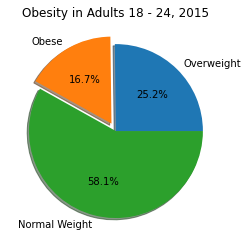

In [73]:
labels = ["Overweight", "Obese", "Normal Weight"]

sizes = [25.2, 16.7, 58.1]

explode = (0, 0.1, 0)

plt.pie(sizes, explode = explode, labels = labels, autopct="%1.1f%%", shadow = True)
plt.title("Obesity in Adults 18 - 24, 2015")

In [75]:
plt.savefig("Resources/obesity_pie_2015")

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Obesity in Adults 18 - 24, 2020')

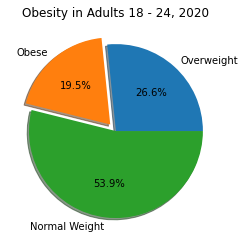

In [74]:
labels = ["Overweight", "Obese", "Normal Weight"]

sizes = [26.6, 19.5, 53.9]

explode = (0, 0.1, 0)

plt.pie(sizes, explode = explode, labels = labels, autopct="%1.1f%%", shadow = True)

plt.title("Obesity in Adults 18 - 24, 2020")

In [76]:
plt.savefig("Resources/obesity_pie_2020")

<Figure size 432x288 with 0 Axes>